In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [3]:
df=pd.read_csv('world_bank_data_2025.csv',parse_dates=['year'],index_col='year')

In [4]:
df.head()

,country_name,country_id,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
year,,,,,,,,,,,,,,,
2010-01-01,Aruba,aw,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
2011-01-01,Aruba,aw,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2012-01-01,Aruba,aw,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
2013-01-01,Aruba,aw,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
2014-01-01,Aruba,aw,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3472 entries, 2010-01-01 to 2025-01-01
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   Inflation (CPI %)                2694 non-null   float64
 3   GDP (Current USD)                2933 non-null   float64
 4   GDP per Capita (Current USD)     2938 non-null   float64
 5   Unemployment Rate (%)            2795 non-null   float64
 6   Interest Rate (Real, %)          1735 non-null   float64
 7   Inflation (GDP Deflator, %)      2904 non-null   float64
 8   GDP Growth (% Annual)            2912 non-null   float64
 9   Current Account Balance (% GDP)  2563 non-null   float64
 10  Government Expense (% of GDP)    1820 non-null   float64
 11  Government Revenue (% of GDP)    1829 non-null   float64
 12  Ta

In [6]:
df.isnull().sum()

country_name                          0
country_id                            0
Inflation (CPI %)                   778
GDP (Current USD)                   539
GDP per Capita (Current USD)        534
Unemployment Rate (%)               677
Interest Rate (Real, %)            1737
Inflation (GDP Deflator, %)         568
GDP Growth (% Annual)               560
Current Account Balance (% GDP)     909
Government Expense (% of GDP)      1652
Government Revenue (% of GDP)      1643
Tax Revenue (% of GDP)             1639
Gross National Income (USD)         676
Public Debt (% of GDP)             2620
dtype: int64

In [7]:
df.shape

(3472, 15)

In [8]:
df.columns

Index(['country_name', 'country_id', 'Inflation (CPI %)', 'GDP (Current USD)',
       'GDP per Capita (Current USD)', 'Unemployment Rate (%)',
       'Interest Rate (Real, %)', 'Inflation (GDP Deflator, %)',
       'GDP Growth (% Annual)', 'Current Account Balance (% GDP)',
       'Government Expense (% of GDP)', 'Government Revenue (% of GDP)',
       'Tax Revenue (% of GDP)', 'Gross National Income (USD)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [9]:
df['country_name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.',
       'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'France', 'Faroe Islands', 'Micronesia, Fed

In [10]:
df['country_name'].nunique()

217

In [11]:
def country_met(country):
    metrics=[
        ('GDP (Current USD)','GDP(Billion USD)',1e9),
        ('GDP per Capita (Current USD)','GDP per Capita (Current USD)',1),
        ('Inflation (CPI %)','Inflation (CPI %)',1),
        ('Unemployment Rate (%)','Unemployment Rate (%)',1),
        ('GDP Growth (% Annual)','GDP Growth (% Annual)',1),
        ('Interest Rate (Real, %)','Interest Rate (Real, %)',1),
        ('Public Debt (% of GDP)','Public Debt (% of GDP)',1)
    ]
    data=df[df['country_name']==country].copy()
    n=len(metrics)

    plt.figure(figsize=(12,4*n))
    for i,(col,ylabel,scale) in enumerate(metrics,1):
        plt.subplot(n,1,i)
        if col in data.columns:
            y=data[col]/scale
            sns.lineplot(x='year',y=y,data=data,marker='o')
            plt.title(f'{col} over years for {country}')
            plt.xlabel('Year')
            plt.ylabel(ylabel)
            plt.grid(True)
    plt.tight_layout()
    plt.show()

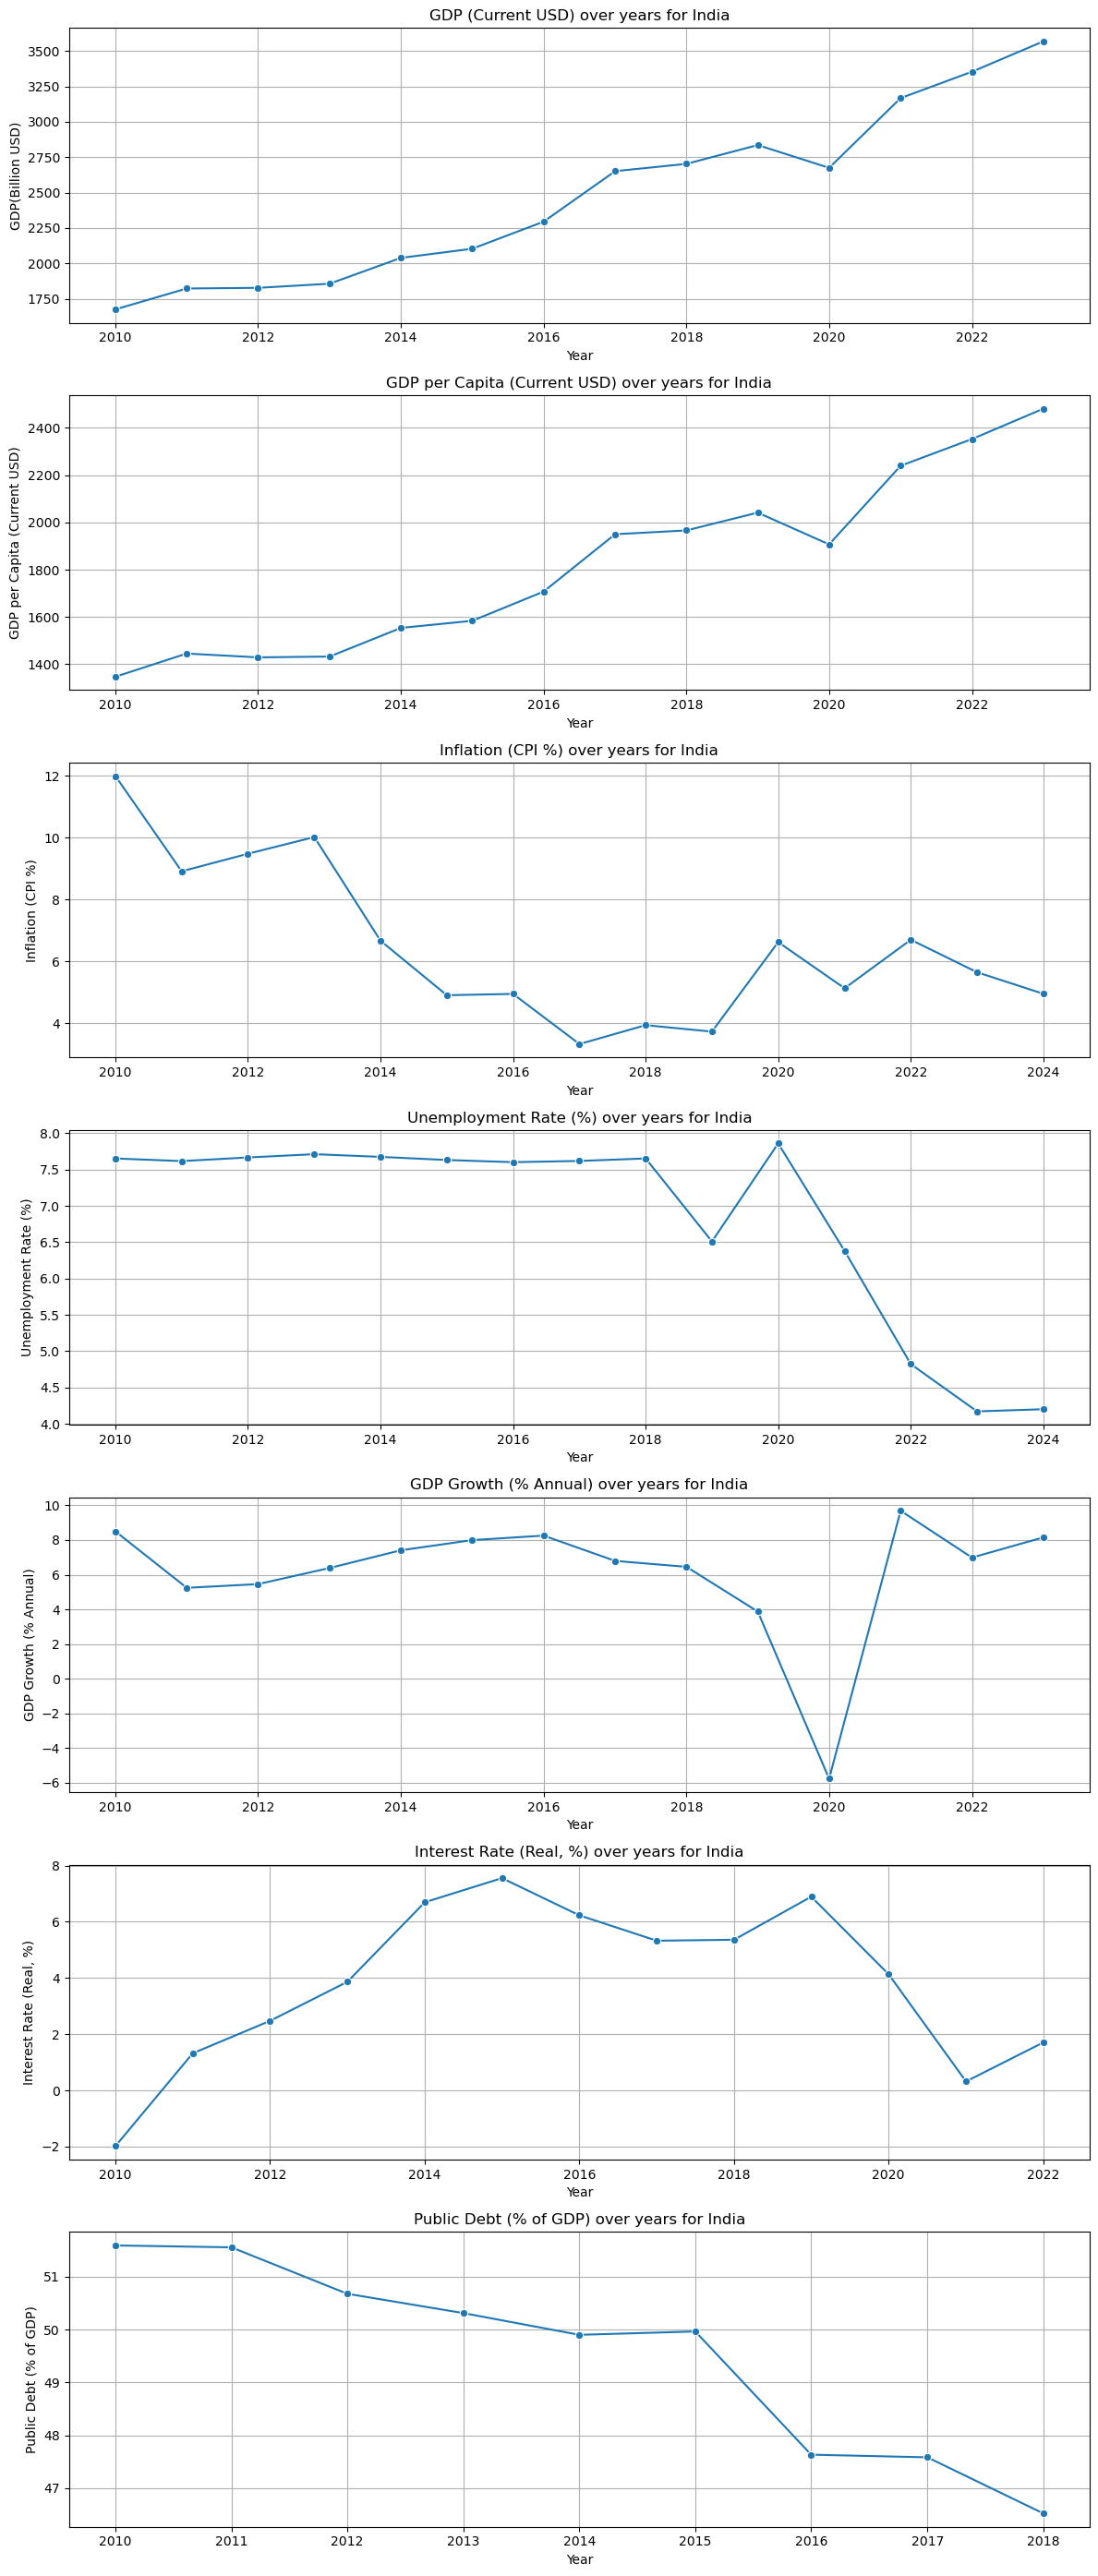

In [12]:
country_met('India')

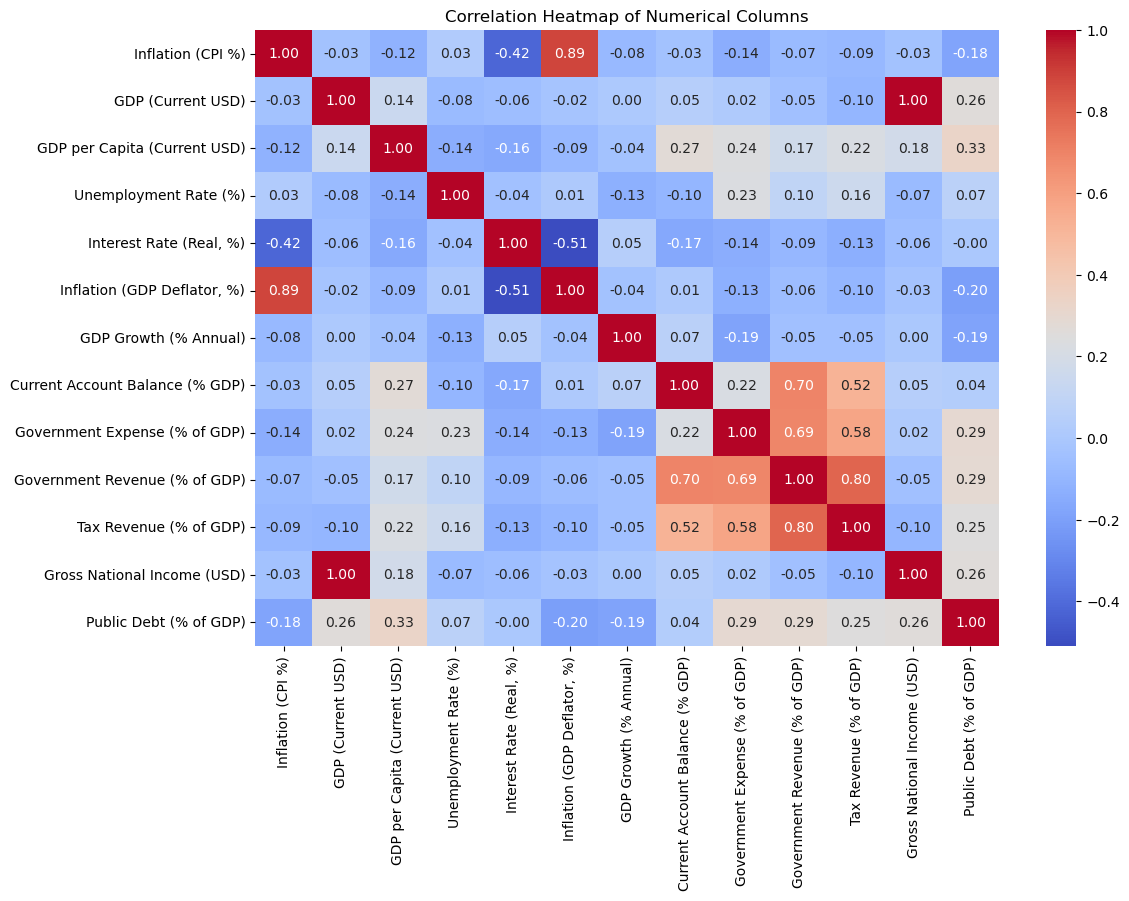

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [14]:
df1=df.drop(columns=['Interest Rate (Real, %)','country_name','country_id'])

In [15]:
df1.shape

(3472, 12)

In [16]:
df.shape

(3472, 15)

In [17]:
df2=df1.dropna()

In [18]:
df2.shape

(780, 12)

In [19]:
df2.head()

,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
year,,,,,,,,,,,,
2011-01-01,3.428071,1.289076e+10,4437.141161,13.481,2.314744,2.545406,-12.933101,23.011107,23.900319,18.022013,1.289410e+10,69.637674
2012-01-01,2.031593,1.231983e+10,4247.631343,13.376,1.042715,1.417243,-10.200176,23.007591,23.050710,17.483234,1.222807e+10,63.669153
2013-01-01,1.937621,1.277622e+10,4413.063383,15.866,0.288746,1.002018,-9.274188,24.160773,22.304950,16.503271,1.299654e+10,70.580770
2014-01-01,1.625865,1.322815e+10,4578.633208,18.055,1.549917,1.774449,-10.775399,24.382665,24.525098,18.301936,1.334942e+10,73.320227
2015-01-01,3.501208,1.138685e+10,3952.803574,17.193,0.563991,2.218726,-8.604880,24.446176,24.738150,18.515790,1.152181e+10,79.864418


In [20]:
X=df2.drop(columns=['Government Revenue (% of GDP)'])
y=df2['Government Revenue (% of GDP)']

In [21]:
X.head(1)

,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
year,,,,,,,,,,,
2011-01-01,3.428071,1.289076e+10,4437.141161,13.481,2.314744,2.545406,-12.933101,23.011107,18.022013,1.289410e+10,69.637674


In [22]:
y.head()

year
2011-01-01    23.900319
2012-01-01    23.050710
2013-01-01    22.304950
2014-01-01    24.525098
2015-01-01    24.738150
Name: Government Revenue (% of GDP), dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [25]:
models={
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree':DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector': SVR(),
}

In [26]:
results=[]

In [27]:
X_test.head()

,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
year,,,,,,,,,,,
2016-01-01,7.042448,1.276786e+12,8663.158203,5.591,2.844223,0.193690,1.916437,31.028447,9.183122,1.241290e+12,14.241740
2021-01-01,5.052329,2.865782e+11,14986.785490,5.590,5.610255,5.545710,-7.176415,37.000497,14.923741,2.808505e+11,55.763127
2017-01-01,1.850788,2.065669e+11,42913.186956,4.736,3.616933,3.397283,-2.809068,29.921310,27.331043,1.987369e+11,38.662718
2014-01-01,-0.076165,1.017131e+11,18770.928990,11.536,-0.132602,2.707951,1.776208,40.049895,17.388467,1.002942e+11,65.702297
2021-01-01,5.689208,1.316569e+12,10314.050674,4.019,4.487973,6.048483,-0.341323,20.892384,13.411262,1.282549e+12,44.860956


In [28]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    results.append(
        {
            'Model':name,
            'MAE':mae,
            'MSE':mse,
            'R2 Score':r2
        }
    )

C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.83496e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.132e+03, tolerance: 4.533e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.826e+03, tolerance: 4.533e+00
  model = cd_fast.enet_coordinate_descent(


In [29]:
result_df=pd.DataFrame(results).sort_values(by='R2 Score',ascending=False)
print(result_df)

               Model       MAE        MSE  R2 Score
6      Random Forest  1.345708   4.551671  0.943323
5  Gradient Boosting  1.603996   5.150460  0.935867
0  Linear Regression  1.974870   6.074939  0.924356
1              Ridge  1.974901   6.075025  0.924355
3        Elastic Net  2.021869   6.253538  0.922132
2              Lasso  2.059282   6.477820  0.919339
4      Decision Tree  1.850973  15.323216  0.809198
7     Support Vector  7.348224  80.525774 -0.002691


C:\Users\91637\AppData\Local\Temp\ipykernel_2692\3547025518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Model',y='R2 Score', data=result_df,palette='viridis')


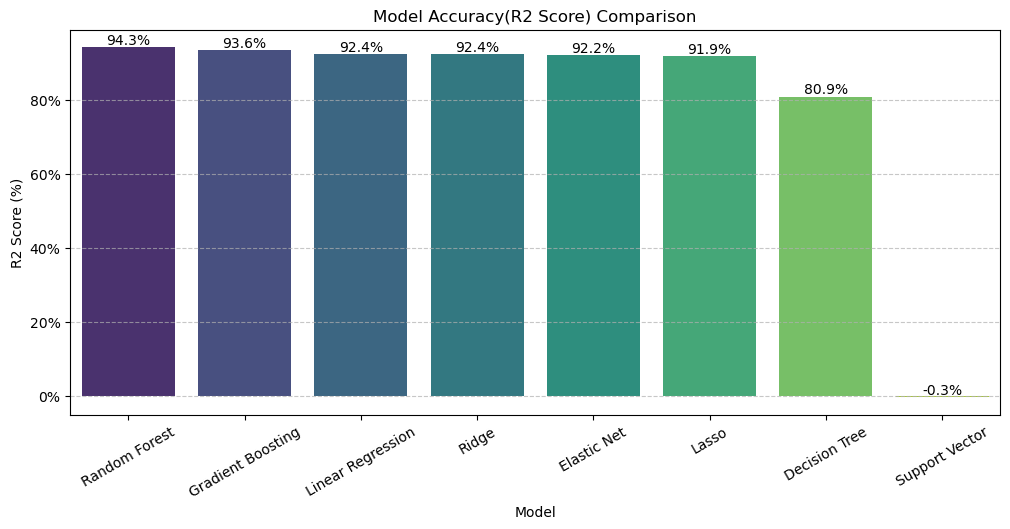

In [33]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x='Model',y='R2 Score', data=result_df,palette='viridis')
plt.title('Model Accuracy(R2 Score) Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score (%)')   # This sets the y-axis limits
plt.xticks(rotation=30)   # This rotates the x-axis tick labels by 30 degrees:
plt.grid(axis='y',linestyle='--',alpha=0.7)

# Show percentage on top of bars

for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height*100:.1f}%',
               (p.get_x()+p.get_width()/2,height),
               ha='center',va='bottom',fontsize=10)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y*100)))

plt.show()

In [31]:
# best_model=RandomForestRegressor()
# best_model.fit(X_train,y_train)